<a href="https://colab.research.google.com/github/marcus-v-rodrigues/ml-project/blob/main/Trabalho_Pr%C3%A1tico_1_%E2%80%93_Tarefas_Preditivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marcus Vinícius Santos Rodrigues - 11218862

##Instalação de pacotes

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

import pygraphviz as pgv
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Importar datasets

In [ ]:
# Carregando os dados espectrais e metadados de arquivos CSV
spectra = pd.read_csv('pure_spectra_matrix.csv', header=None, sep=';')  # Matriz de dados das amostras puras; sem cabeçalho, separados por ponto e vírgula
metadata = pd.read_csv('pure_spectra_metadata.csv', sep=';')  # Metadados das amostras puras; separados por ponto e vírgula

In [ ]:
spectra # Visualização da matriz de dados das amostras puras

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0,0,0.0000,0.0,0.0,0,44431.921875,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0,0,0.0000,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,27667.777344,0.0,0,0.0,35438.351562,0.0,0.0,0.0,0.000000,0.0
2,0,0,0.0000,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,59820.968750,0.0,0,0.0,6384.590820,0.0,0.0,0.0,0.000000,0.0
3,0,0,0.0000,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0,0,0.0000,0.0,0.0,0,4701.712402,0.0,0.0,0.0,...,3913.969727,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,0,0,0.0000,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
567,0,0,0.0000,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
568,0,0,0.0000,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,24808.794922,0.0
569,0,0,145578.5625,0.0,0.0,0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


In [ ]:
spectra.describe() # Resumo estatístico da matriz de dados das amostras puras

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
count,571.0,571.0,5.710000e+02,5.710000e+02,5.710000e+02,571.0,5.710000e+02,5.710000e+02,5.710000e+02,571.000000,...,571.000000,571.000000,571.0,571.000000,571.000000,571.000000,571.000000,5.710000e+02,571.000000,5.710000e+02
mean,0.0,0.0,7.139591e+04,1.533017e+04,5.068415e+03,0.0,2.819248e+04,1.016611e+04,8.026213e+04,8890.188176,...,2172.442772,68.217474,0.0,9192.080156,4351.702139,13.798637,1088.993595,2.908994e+04,10244.355712,3.529715e+04
std,0.0,0.0,4.502179e+05,2.790895e+05,6.752011e+04,0.0,1.462817e+05,8.954112e+04,5.129584e+05,67508.423481,...,19751.125309,1195.985103,0.0,44780.124445,30011.743237,329.726787,25611.372549,1.697803e+05,59088.401725,2.987713e+05
min,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
max,0.0,0.0,7.028834e+06,6.252400e+06,1.260595e+06,0.0,2.160791e+06,1.961872e+06,5.417460e+06,933186.750000,...,396886.500000,26568.656250,0.0,597641.250000,408591.843750,7879.021484,611936.875000,1.736937e+06,839514.812500,4.460539e+06


In [ ]:
metadata # Visualização dos metadados das amostras puras

,Species,Strain
0,RTO.TQH,1
1,BUT.YZE,2
2,BUT.YZE,2
3,BUT.YZE,2
4,BUT.YZE,2
...,...,...
566,VVJ.KWJ,212
567,VVJ.KWJ,212
568,VVJ.KWJ,212
569,QBG.CRP,213


## Exploração dos dados

In [ ]:
# Obtendo os índices das 10 características com maior variância e selecionando estas características do DataFrame
top_variance_features = spectra[spectra.var().nlargest(10).index]

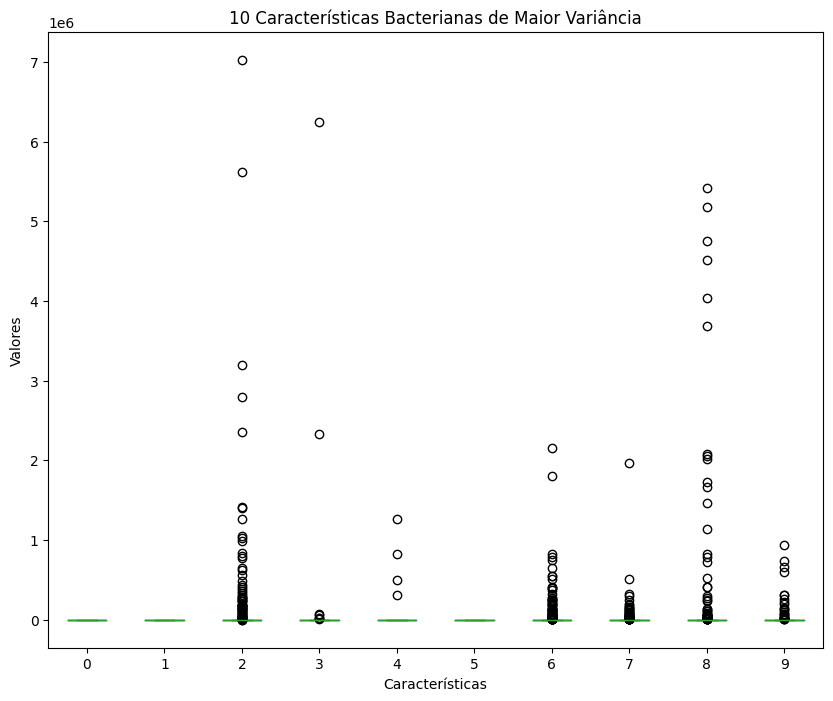

In [ ]:
# Boxplot para as 10 características bacterianas de maior variância
spectra.iloc[:, :10].plot(kind='box', figsize=(10, 8))
plt.title('10 Características Bacterianas de Maior Variância')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.show()

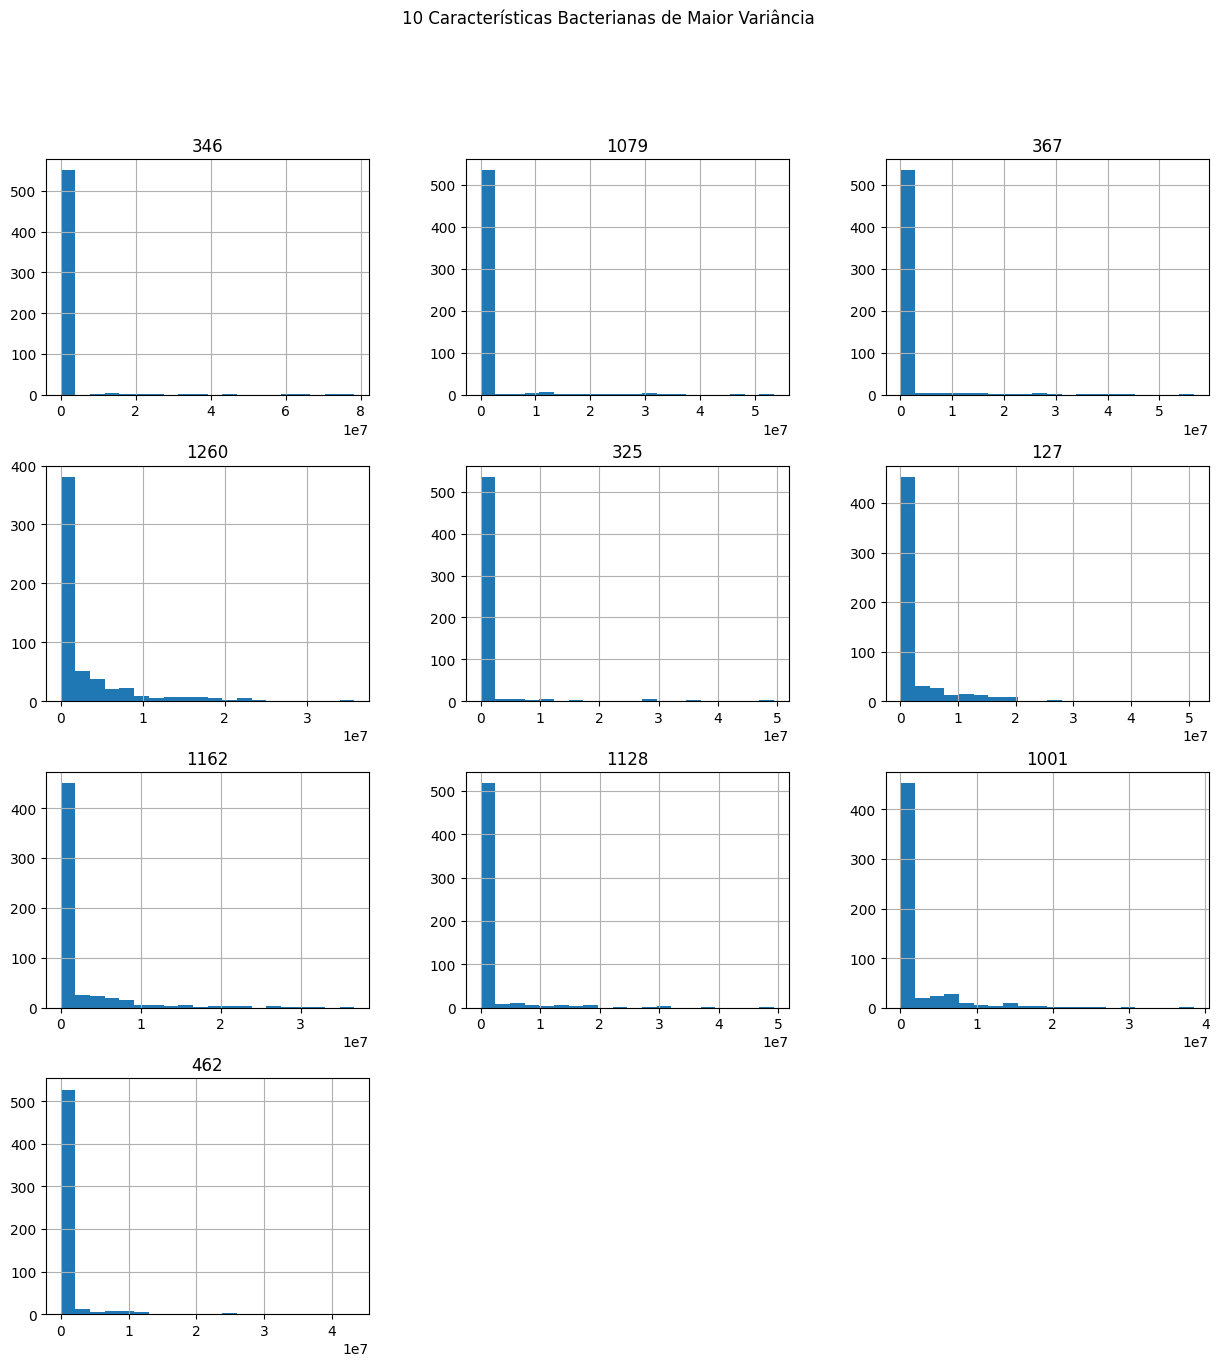

In [ ]:
# Histogramas para as 10 características bacterianas de maior variância
top_variance_features.hist(figsize=(15, 15), bins=20)
plt.suptitle('10 Características Bacterianas de Maior Variância')
plt.show()

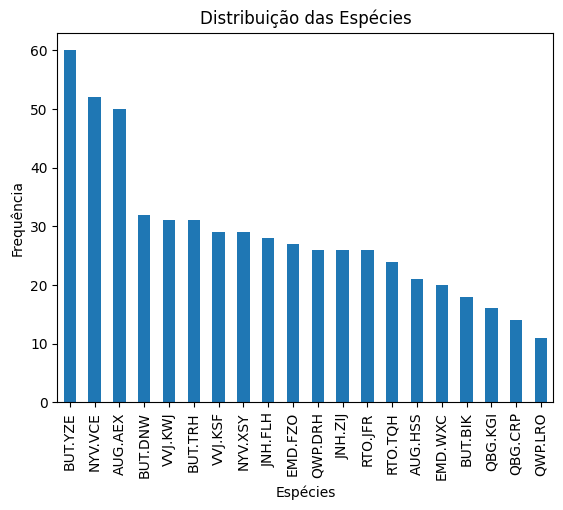

In [ ]:
# Histograma das distribuição das espécies
metadata['Species'].value_counts().plot(kind='bar')
plt.title('Distribuição das Espécies')
plt.xlabel('Espécies')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Lendo e processando dados taxonômicos a partir de um arquivo de texto
taxonomy_data = pd.read_csv('pure_spectra_taxonomy.txt', header=None, sep=' ', names=['Child', 'Parent'])
# Criar um dicionário para seguir a cadeia de parentesco até o topo
parent_map = dict(zip(taxonomy_data['Child'], taxonomy_data['Parent']))  # Mapeia cada espécie ao seu parente taxonômico

In [ ]:
# Função para encontrar o caminho completo até o domínio
def find_hierarchy_path(species, parent_map):
    path = [species]  # Inicia o caminho com a espécie atual
    while species in parent_map:
        if species == parent_map[species]:  # Verifica ciclo para evitar loop infinito
            break
        species = parent_map[species]  # Acessa o próximo nível parentesco
        path.append(species)  # Adiciona ao caminho
    return path  # Retorna o caminho desde a espécie até o domínio

In [ ]:
# Aplicando a função otimizada a todas as espécies
all_species = taxonomy_data['Child'].unique()  # Todas as espécies únicas no dataset
full_paths = {}
for species in all_species:
    path = find_hierarchy_path(species, parent_map)
    if len(path) == 7:  # Filtra caminhos que tenham exatamente 7 níveis (incluindo espécie até domínio)
        full_paths[species] = path

##Grafo

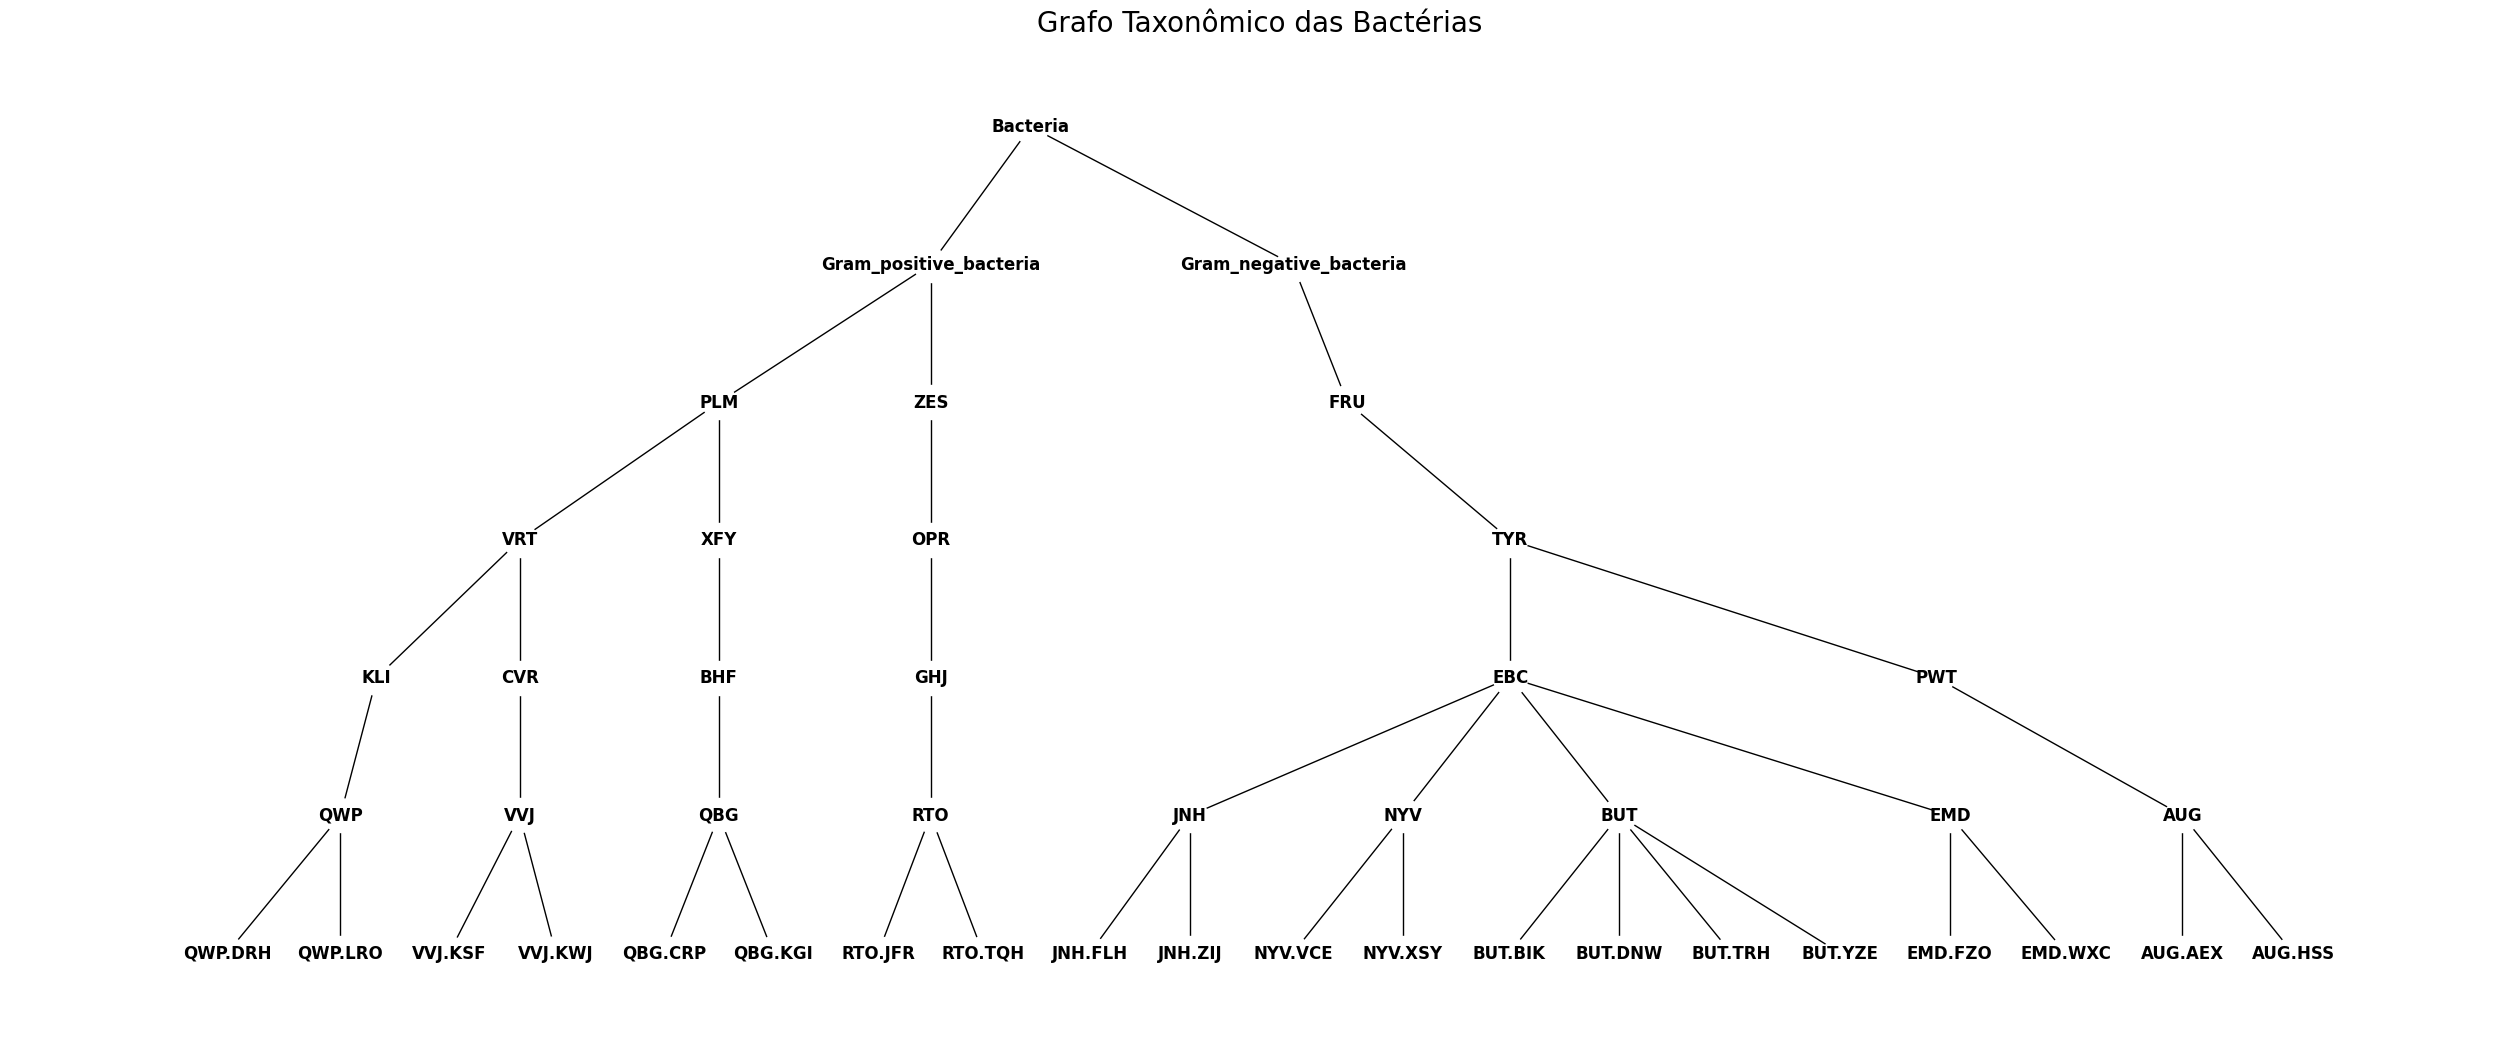

In [ ]:
# Criação do grafo direcionado para visualização taxonômica
G = nx.DiGraph()
# Adicionando nós e arestas baseados nos caminhos encontrados
for key, path in full_paths.items():
    for i in range(len(path) - 1):
        G.add_edge(path[i + 1], path[i])  # Adiciona aresta do parent para o child

# Gerar layout hierárquico usando Graphviz
pos = graphviz_layout(G, prog="dot", args="-Granksep=2.0 -Gsplines=ortho")  # Layout ortogonal com separação entre os ranks

# Desenhar o grafo com matplotlib
plt.figure(figsize=(25, 10))
nx.draw(G, pos, with_labels=True, node_size=600, font_size=12, node_color="white", edge_color="black", font_weight="bold", arrows=False)  # Detalhes visuais do grafo
plt.title("Grafo Taxonômico das Bactérias", fontsize=20)  # Título do grafo
plt.show()  # Exibe o grafo

## Pré-processamento

In [ ]:
# Dataframe gerado a partir do objeto com os caminhos completos dos dados taxonômicos
taxonomy_df = pd.DataFrame.from_dict(full_paths, orient='index', columns=['Species', 'Genus', 'Family', 'Order', 'Class', 'Phylum', 'Domain'])
taxonomy_df.reset_index(drop=True, inplace=True)  # Resetando o índice para limpeza
taxonomy_df

,Species,Genus,Family,Order,Class,Phylum,Domain
0,QWP.DRH,QWP,KLI,VRT,PLM,Gram_positive_bacteria,Bacteria
1,QWP.LRO,QWP,KLI,VRT,PLM,Gram_positive_bacteria,Bacteria
2,JNH.FLH,JNH,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
3,JNH.ZIJ,JNH,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
4,QBG.CRP,QBG,BHF,XFY,PLM,Gram_positive_bacteria,Bacteria
5,QBG.KGI,QBG,BHF,XFY,PLM,Gram_positive_bacteria,Bacteria
6,NYV.VCE,NYV,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
7,NYV.XSY,NYV,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
8,AUG.AEX,AUG,PWT,TYR,FRU,Gram_negative_bacteria,Bacteria
9,AUG.HSS,AUG,PWT,TYR,FRU,Gram_negative_bacteria,Bacteria


In [ ]:
metadata = metadata.merge(taxonomy_df, on='Species', how='left')  # Integração dos dados taxonômicos aos metadados
metadata

,Species,Strain,Genus,Family,Order,Class,Phylum,Domain
0,RTO.TQH,1,RTO,GHJ,OPR,ZES,Gram_positive_bacteria,Bacteria
1,BUT.YZE,2,BUT,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
2,BUT.YZE,2,BUT,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
3,BUT.YZE,2,BUT,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
4,BUT.YZE,2,BUT,EBC,TYR,FRU,Gram_negative_bacteria,Bacteria
...,...,...,...,...,...,...,...,...
566,VVJ.KWJ,212,VVJ,CVR,VRT,PLM,Gram_positive_bacteria,Bacteria
567,VVJ.KWJ,212,VVJ,CVR,VRT,PLM,Gram_positive_bacteria,Bacteria
568,VVJ.KWJ,212,VVJ,CVR,VRT,PLM,Gram_positive_bacteria,Bacteria
569,QBG.CRP,213,QBG,BHF,XFY,PLM,Gram_positive_bacteria,Bacteria


### Pipeline

In [ ]:
# Configuração inicial do pipeline de pré-processamento
log_transformer = FunctionTransformer(np.log1p)  # Transformação logarítmica para normalização
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputação para tratar valores faltantes
    ('log_transformer', log_transformer),  # Aplicação da transformação logarítmica
    ('scaler', StandardScaler()),  # Padronização dos dados
    ('min_max_scaler', MinMaxScaler())  # Escala os dados para o intervalo [0, 1]
])

In [ ]:
# Aplicando o pipeline de pré-processamento aos dados das amostras
X_preprocessed = preprocessing_pipeline.fit_transform(spectra)

In [ ]:
# Extração de vetor de rótulos inicial e rebalanceamento dos dados
y_initial = metadata['Species']  # Rótulos das espécies para classificação

### Oversampling

In [ ]:
# Técnica de oversampling para balancear classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_preprocessed, y_initial)

# Sincronização dos metadados após rebalanceamento
metadata_resampled = metadata.loc[ros.sample_indices_]  # Atualiza metadados para corresponder aos dados rebalanceados

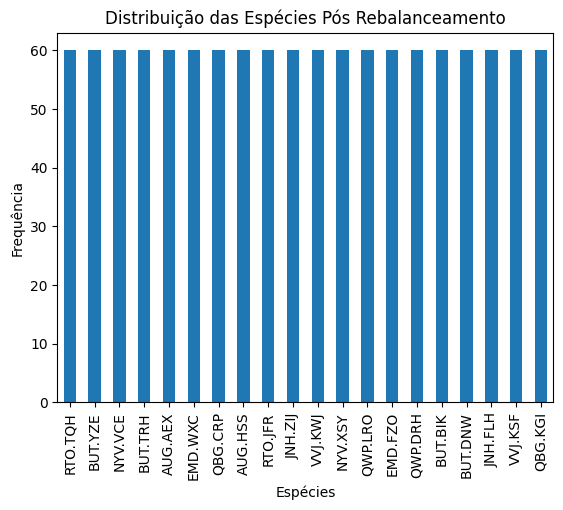

In [ ]:
# Histograma das distribuição das espécies
metadata_resampled['Species'].value_counts().plot(kind='bar')
plt.title('Distribuição das Espécies Pós Rebalanceamento')
plt.xlabel('Espécies')
plt.ylabel('Frequência')
plt.show()

### PCA

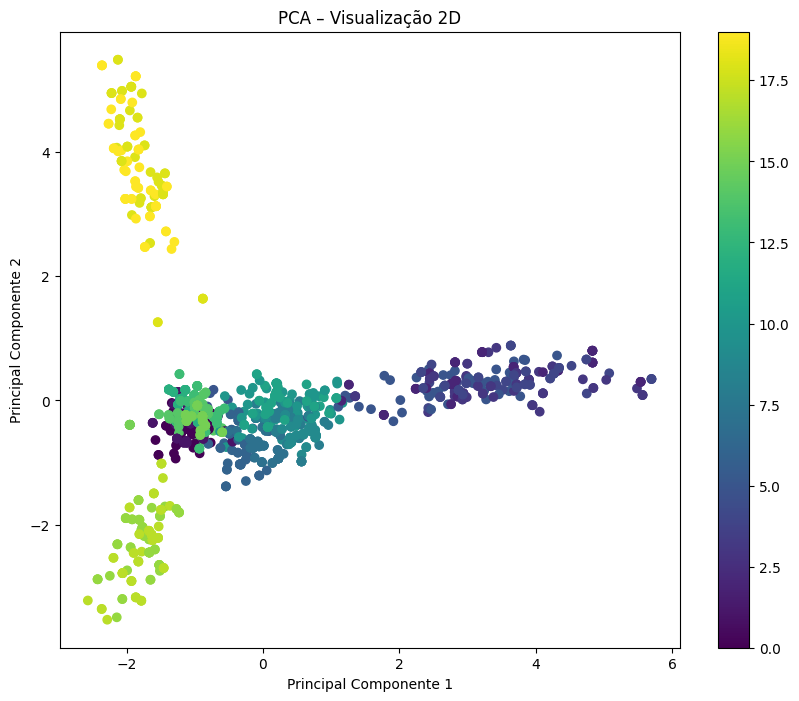

In [ ]:
# Redução de dimensionalidade com PCA
pca = PCA(n_components=0.95)  # Mantém 95% da variância explicada
X_pca = pca.fit_transform(X_resampled)  # Aplica PCA aos dados resampled

# Análise PCA para visualização bidimensional dos dados
plt.figure(figsize=(10, 8))
# Utilizando 'cat.codes' para converter categorias de espécies em códigos numéricos para coloração
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=metadata_resampled['Species'].astype('category').cat.codes, cmap='viridis')
plt.colorbar()  # Mostra a barra de cores que corresponde aos códigos das espécies
plt.title('PCA – Visualização 2D')
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Componente 2')
plt.show()

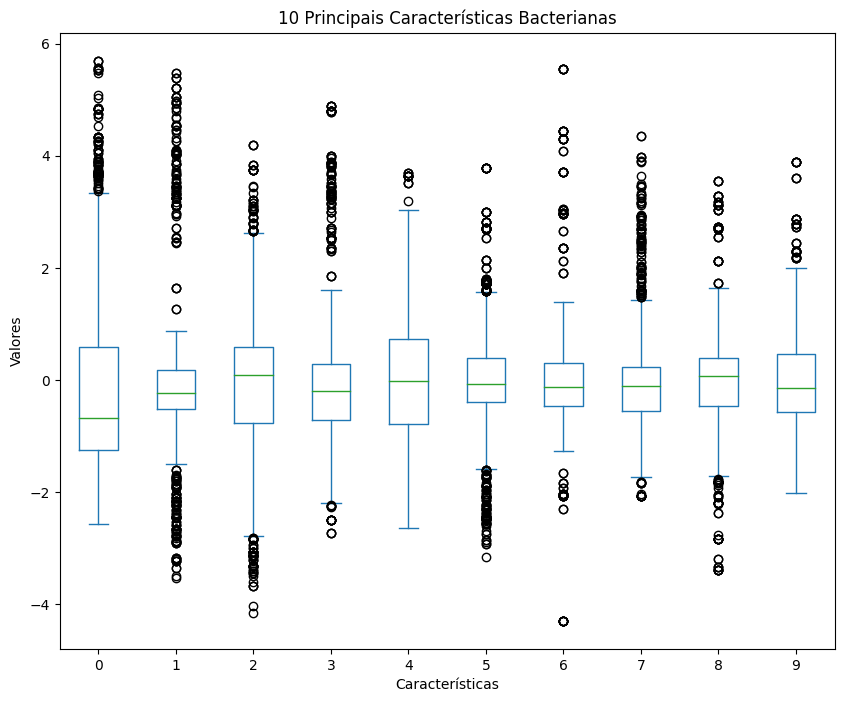

In [ ]:
# Boxplot para as 10 principais características bacterianas
corr_matrix = pd.DataFrame(data=X_pca)
corr_matrix.iloc[:, :10].plot(kind='box', figsize=(10, 8))
plt.title('10 Principais Características Bacterianas')
plt.xlabel('Características')
plt.ylabel('Valores')
plt.show()

## Classificador Hierárquico

In [ ]:
# Define os níveis taxonômicos que serão usados na classificação hierárquica
levels = ['Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']

# Dicionário para armazenar os classificadores treinados para cada nível taxonômico
classifiers = {}

# Matriz de características que será usada para o treinamento dos classificadores
X_current = X_pca

# Variável que armazenará os rótulos atuais utilizados em cada iteração de classificação
y_current = None

# Configuração dos parâmetros que serão otimizados no RandomForestClassifier
param_distributions = {
    'randomforestclassifier__n_estimators': [100, 200, 300],  # Número de árvores na floresta
    'randomforestclassifier__max_features': ['sqrt', 'log2'],  # Número de características consideradas para dividir um nó
    'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Profundidade máxima de cada árvore
    'randomforestclassifier__min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]     # Número mínimo de amostras em um nó folha
}

# Pipeline do classificador hierárquico
pipeline = make_pipeline(RandomForestClassifier(random_state=42))  # Utiliza RandomForestClassifier como algoritmo de classificação

# Configuração do método de validação cruzada usando StratifiedKFold
cv = StratifiedKFold(n_splits=10)  # Utiliza 10 folds na validação cruzada estratificada

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score de acurácia para Phylum: 1.0

Cross-validation scores para Phylum: 
Fold 1: 1.0;  Fold 2: 1.0;  Fold 3: 1.0;  Fold 4: 1.0;  Fold 5: 1.0;  Fold 6: 1.0;  Fold 7: 1.0;  Fold 8: 1.0;  Fold 9: 1.0;  Fold 10: 1.0;

Acurácia média para Phylum: 1.0




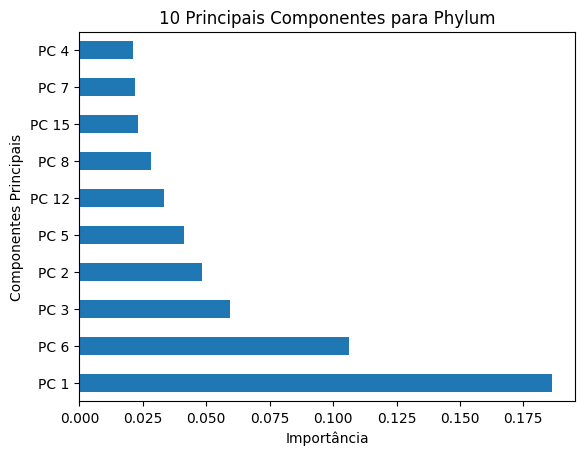

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score de acurácia para Class: 0.9983333333333334

Cross-validation scores para Class: 
Fold 1: 1.0;  Fold 2: 1.0;  Fold 3: 1.0;  Fold 4: 1.0;  Fold 5: 1.0;  Fold 6: 1.0;  Fold 7: 1.0;  Fold 8: 1.0;  Fold 9: 1.0;  Fold 10: 1.0;

Acurácia média para Class: 0.9983333333333334




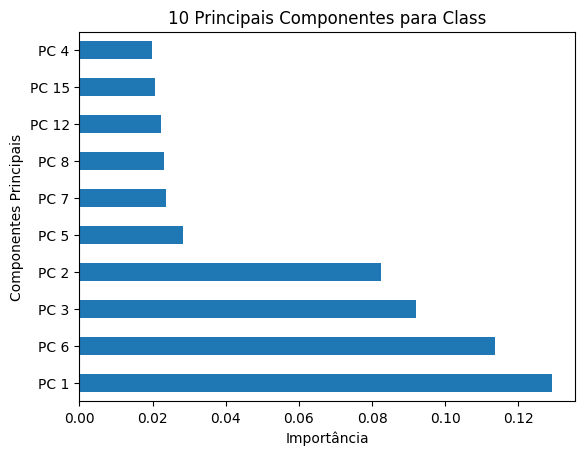

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score de acurácia para Order: 0.9983333333333334

Cross-validation scores para Order: 
Fold 1: 1.0;  Fold 2: 1.0;  Fold 3: 1.0;  Fold 4: 1.0;  Fold 5: 1.0;  Fold 6: 1.0;  Fold 7: 1.0;  Fold 8: 1.0;  Fold 9: 1.0;  Fold 10: 1.0;

Acurácia média para Order: 0.9983333333333334




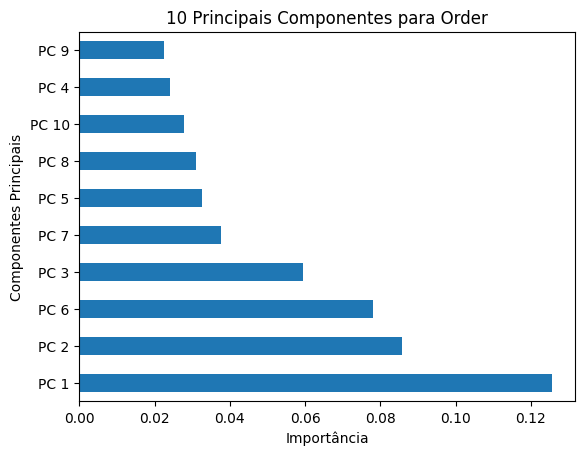

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score de acurácia para Family: 1.0

Cross-validation scores para Family: 
Fold 1: 1.0;  Fold 2: 1.0;  Fold 3: 1.0;  Fold 4: 1.0;  Fold 5: 1.0;  Fold 6: 1.0;  Fold 7: 1.0;  Fold 8: 1.0;  Fold 9: 1.0;  Fold 10: 1.0;

Acurácia média para Family: 1.0




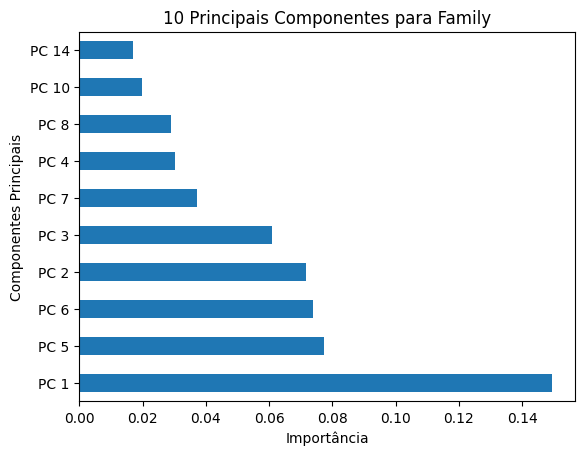

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score de acurácia para Genus: 0.9949999999999999

Cross-validation scores para Genus: 
Fold 1: 1.0;  Fold 2: 1.0;  Fold 3: 1.0;  Fold 4: 1.0;  Fold 5: 1.0;  Fold 6: 1.0;  Fold 7: 1.0;  Fold 8: 1.0;  Fold 9: 1.0;  Fold 10: 1.0;

Acurácia média para Genus: 0.9949999999999999




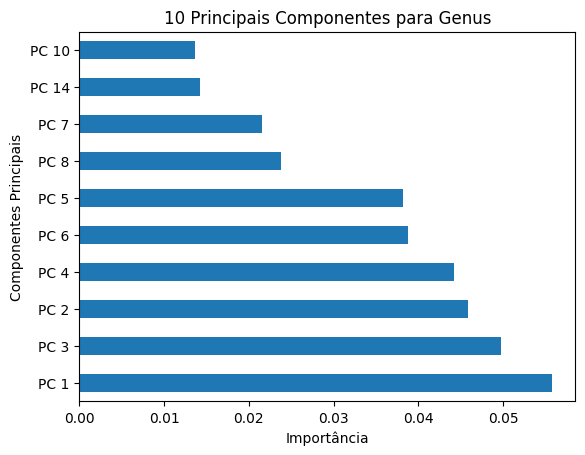

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Melhor score de acurácia para Species: 0.9841666666666666

Cross-validation scores para Species: 
Fold 1: 1.0;  Fold 2: 1.0;  Fold 3: 1.0;  Fold 4: 1.0;  Fold 5: 1.0;  Fold 6: 1.0;  Fold 7: 1.0;  Fold 8: 1.0;  Fold 9: 1.0;  Fold 10: 1.0;

Acurácia média para Species: 0.9841666666666666




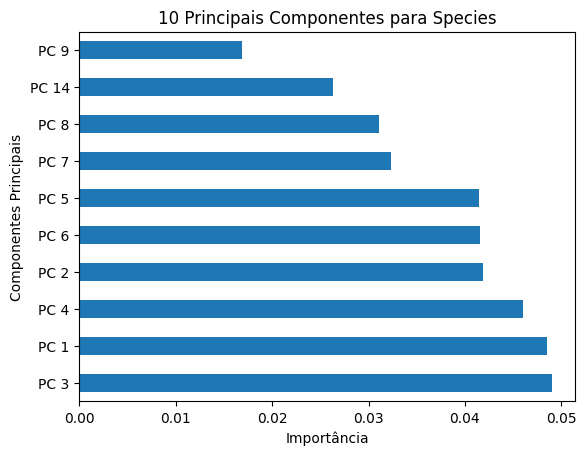

In [ ]:
# Treinamento sequencial dos classificadores para cada nível taxonômico
for i, level in enumerate(levels):

  y_current = metadata_resampled[level].values  # Extrai os rótulos do nível atual do DataFrame resampled

  random_search = RandomizedSearchCV(
      pipeline,
      param_distributions=param_distributions,
      n_iter=10,
      cv=cv,
      scoring='accuracy',
      verbose=1,
      n_jobs=-1,
      random_state=42
  )
  random_search.fit(X_current, y_current) # Treina o modelo no nível atual
  classifiers[level] = random_search.best_estimator_ # Armazena o melhor classificador para o nível

  print(f"Melhor score de acurácia para {level}: {random_search.best_score_}\n")  # Exibe o melhor score de acurácia encontrado

  scores = cross_val_score(classifiers[level], X_current, y_current, cv=cv)  # Avaliação do modelo com validação cruzada

  # Construindo a string com os valores de cada fold
  folds_str = ";  ".join([f"Fold {i+1}: {score:.1f}" for i, score in enumerate(scores)])
  print(f"Cross-validation scores para {level}: \n{folds_str};") # Exibe os scores de validação cruzada

  print(f"\nAcurácia média para {level}: {np.mean(scores)}\n\n")  # Calcula e exibe a acurácia média

  # Acessa o melhor estimador encontrado pelo RandomizedSearchCV e pega a etapa do RandomForestClassifier dentro do pipeline
  best_estimator = random_search.best_estimator_.named_steps['randomforestclassifier']

  importances_series = pd.Series(  # Armazena as importâncias das características
      best_estimator.feature_importances_,  # Obtém as importâncias das características do melhor estimador
      index=[f'PC {i+1}' for i in range(X_pca.shape[1])]  # Define os índices da série como PC 1, PC 2, ..., PC n, onde n é o número de componentes principais
  )

  # Plota as 10 características mais importantes como um gráfico de barras horizontais
  importances_series.nlargest(10).plot(kind='barh')
  plt.title(f'10 Principais Componentes para {level}')
  plt.xlabel('Importância')  # Define o rótulo do eixo x
  plt.ylabel('Componentes Principais')  # Define o rótulo do eixo y
  plt.show()  # Exibe o gráfico


  # Verifica se o nível atual não é o último nível da hierarquia
  if i < len(levels) - 1:

    # Extrai os rótulos do próximo nível hierárquico para usar na próxima iteração do treinamento.
    y_next_level = metadata_resampled[levels[i + 1]].values

    # Utiliza o modelo treinado para fazer previsões com o conjunto de dados atual.
    predicted_current = random_search.predict(X_current)

    # Cria uma máscara booleana que é True onde a predição é igual ao rótulo verdadeiro.
    mask = (predicted_current == y_current)

    # Aplica a máscara ao array de características, mantendo apenas as linhas onde as previsões foram corretas.
    X_current = X_current[mask]

    # Aplica a máscara ao array de rótulos do próximo nível, sincronizando os rótulos com as características filtradas.
    y_current = y_next_level[mask]

## Avaliação e visualização

Relatório de classificação para Phylum:
                         precision    recall  f1-score   support

Gram_negative_bacteria       1.00      1.00      1.00       720
Gram_positive_bacteria       1.00      1.00      1.00       480

              accuracy                           1.00      1200
             macro avg       1.00      1.00      1.00      1200
          weighted avg       1.00      1.00      1.00      1200



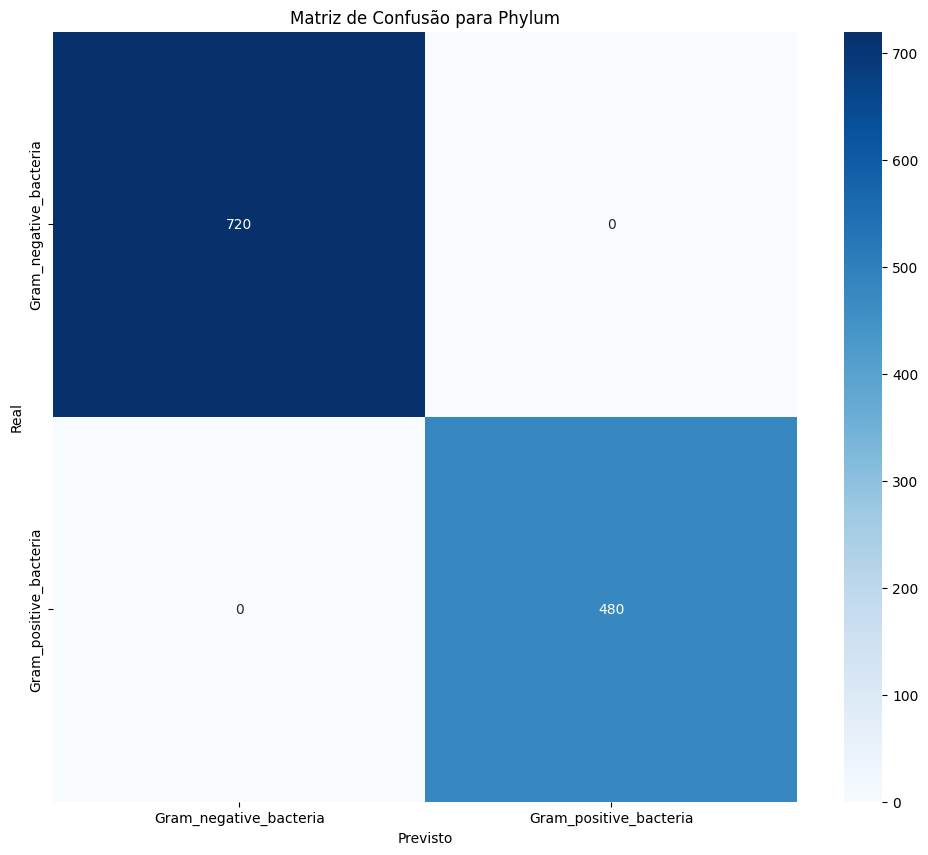

Relatório de classificação para Class:
               precision    recall  f1-score   support

         FRU       1.00      1.00      1.00       720
         PLM       1.00      1.00      1.00       360
         ZES       1.00      0.99      1.00       120

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



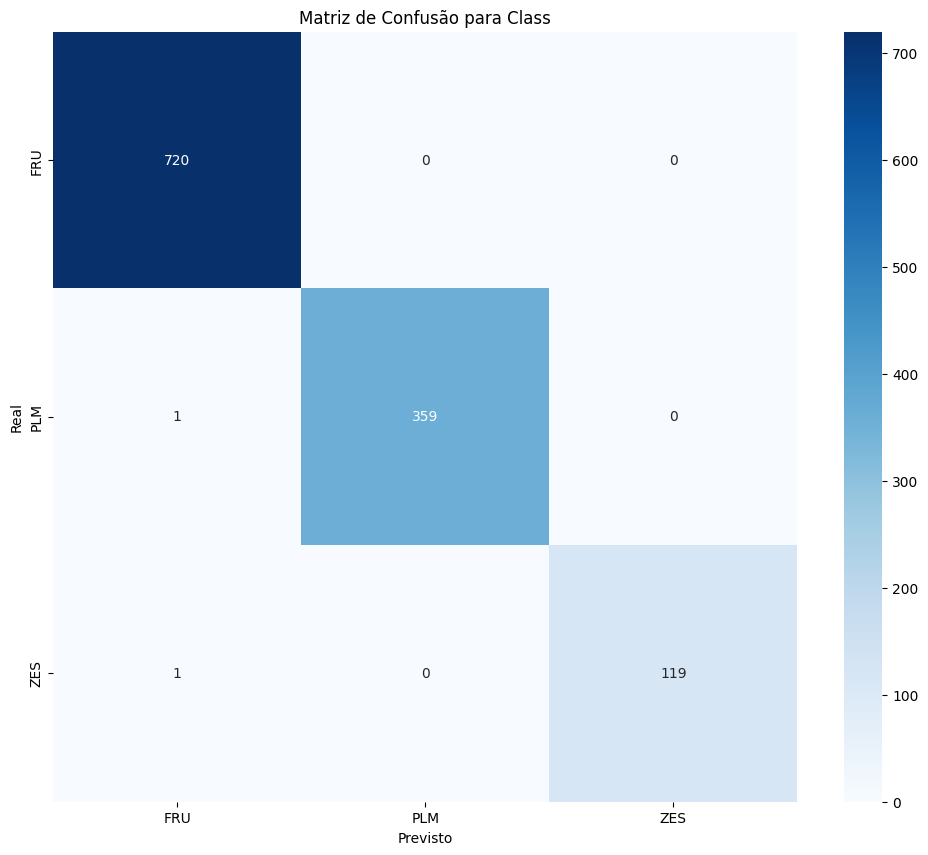

Relatório de classificação para Order:
               precision    recall  f1-score   support

         OPR       1.00      0.99      1.00       120
         TYR       1.00      1.00      1.00       720
         VRT       1.00      1.00      1.00       240
         XFY       1.00      1.00      1.00       120

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



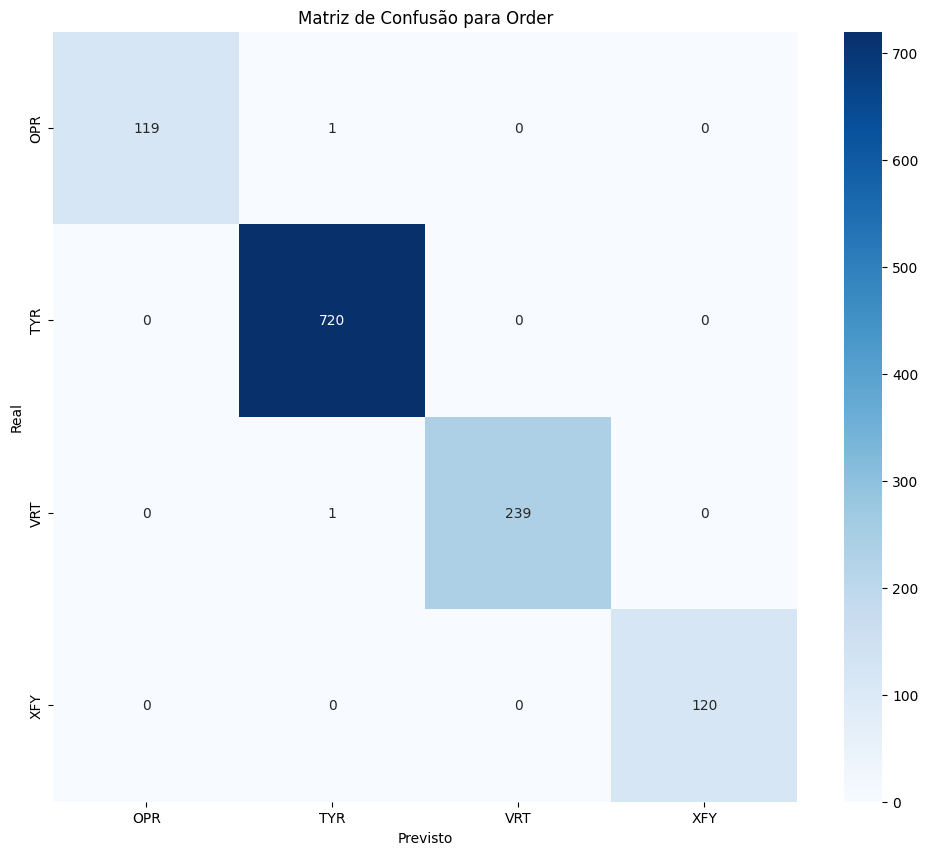

Relatório de classificação para Family:
               precision    recall  f1-score   support

         BHF       1.00      1.00      1.00       120
         CVR       1.00      1.00      1.00       120
         EBC       1.00      1.00      1.00       600
         GHJ       1.00      1.00      1.00       120
         KLI       1.00      1.00      1.00       120
         PWT       1.00      1.00      1.00       120

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200



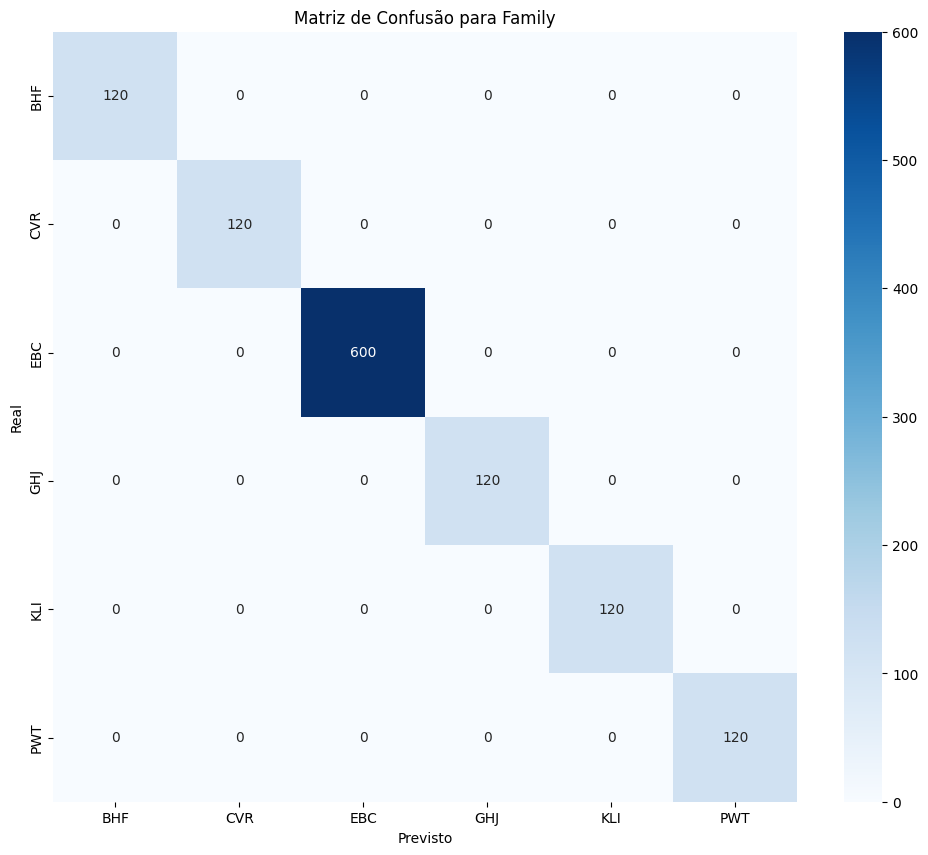

Relatório de classificação para Genus:
               precision    recall  f1-score   support

         AUG       0.99      1.00      1.00       120
         BUT       0.99      0.99      0.99       240
         EMD       1.00      1.00      1.00       120
         JNH       1.00      0.99      1.00       120
         NYV       0.99      0.98      0.99       120
         QBG       0.99      1.00      1.00       120
         QWP       1.00      0.99      1.00       120
         RTO       1.00      1.00      1.00       120
         VVJ       1.00      1.00      1.00       120

    accuracy                           0.99      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      0.99      0.99      1200



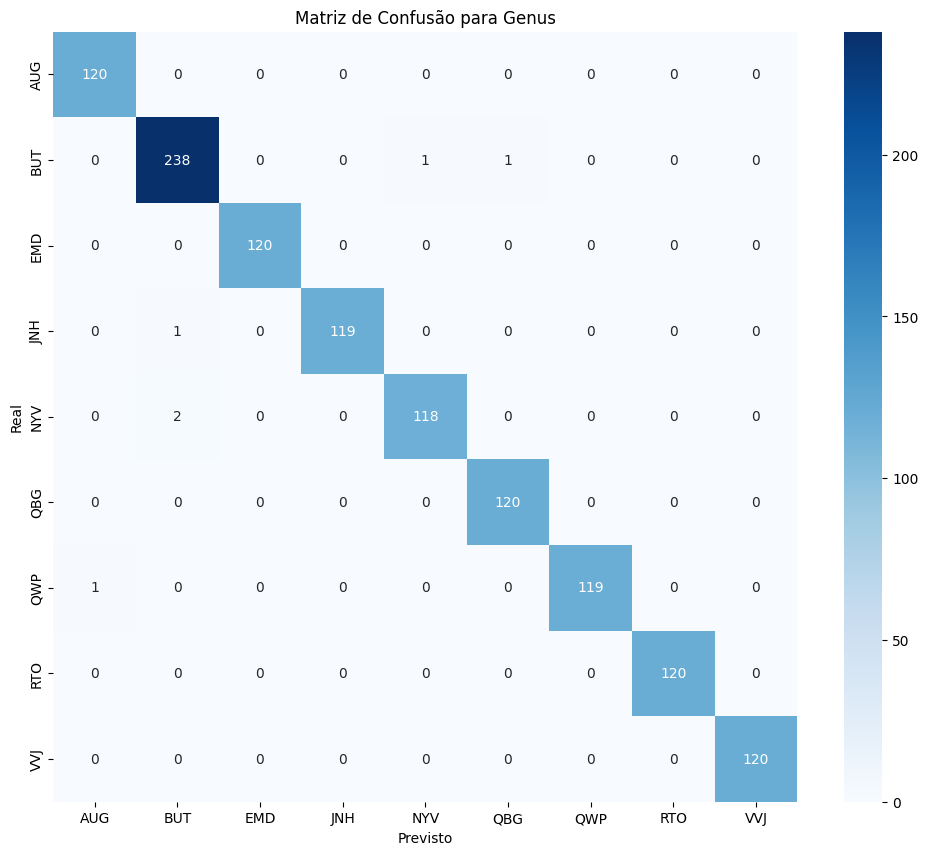

Relatório de classificação para Species:
               precision    recall  f1-score   support

     AUG.AEX       1.00      1.00      1.00        60
     AUG.HSS       1.00      1.00      1.00        60
     BUT.BIK       0.98      0.98      0.98        60
     BUT.DNW       0.98      0.97      0.97        60
     BUT.TRH       0.97      0.98      0.98        60
     BUT.YZE       0.89      0.92      0.90        60
     EMD.FZO       1.00      1.00      1.00        60
     EMD.WXC       1.00      1.00      1.00        60
     JNH.FLH       1.00      0.97      0.98        60
     JNH.ZIJ       0.98      1.00      0.99        60
     NYV.VCE       0.96      0.87      0.91        60
     NYV.XSY       0.92      1.00      0.96        60
     QBG.CRP       1.00      1.00      1.00        60
     QBG.KGI       1.00      1.00      1.00        60
     QWP.DRH       1.00      1.00      1.00        60
     QWP.LRO       1.00      1.00      1.00        60
     RTO.JFR       1.00      1.00      

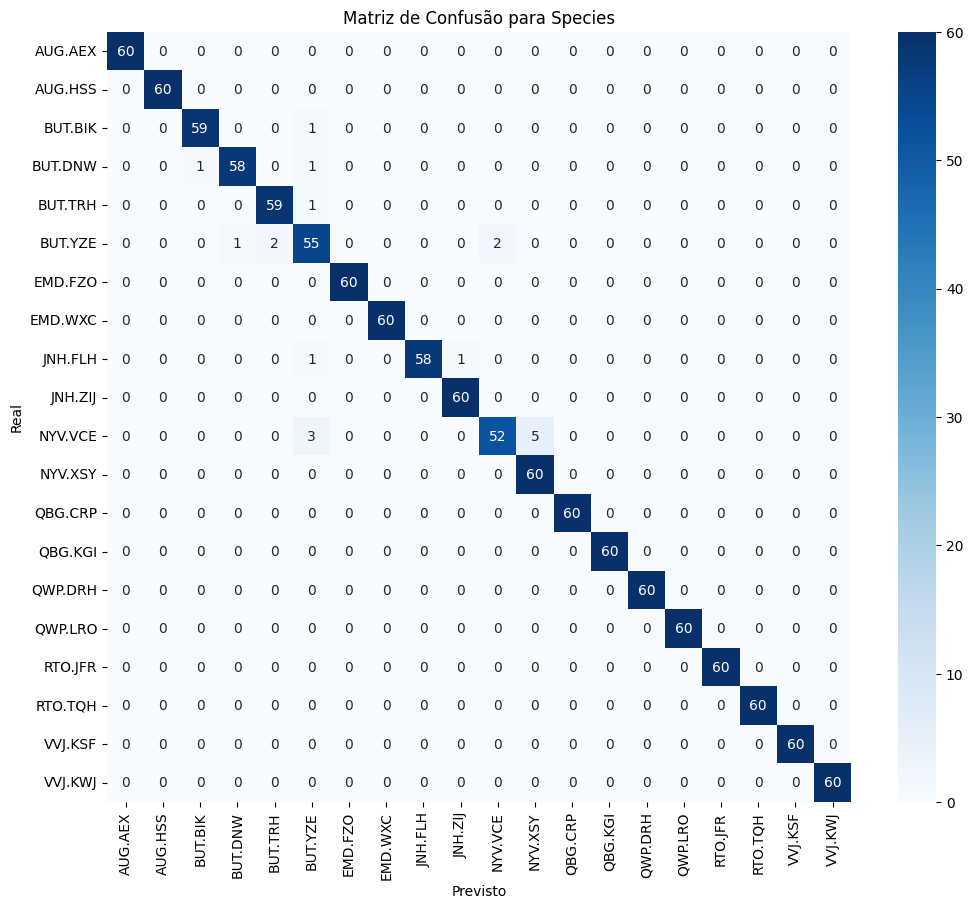

In [ ]:
# Itera sobre cada nível taxonômico definido na lista 'levels'
for level in levels:
    # Extrai os rótulos atuais para o nível taxonômico do DataFrame resampled
    y_current = metadata_resampled[level].values  # Rótulos para classificação atual

    # Executa a predição cruzada para estimar a eficácia do classificador no nível atual
    predicted = cross_val_predict(classifiers[level], X_current, y_current, cv=cv)  # Gera predições cruzadas usando o classificador treinado

    # Gera um relatório de classificação que inclui precisão, recall, f1-score para cada classe
    report = classification_report(y_current, predicted)  # Cria um relatório detalhado das métricas de classificação
    print(f"Relatório de classificação para {level}:\n", report)  # Imprime o relatório de classificação

    # Calcula a matriz de confusão para avaliar o número de classificações corretas e incorretas por classe
    cm = confusion_matrix(y_current, predicted)  # Cria uma matriz de confusão baseada nas predições e verdadeiros rótulos

    # Configuração visual para a matriz de confusão
    plt.figure(figsize=(12, 10))  # Define o tamanho da figura para a matriz de confusão
    # Cria um heatmap para a matriz de confusão usando a biblioteca seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y_current), yticklabels=np.unique(y_current))
    plt.title(f'Matriz de Confusão para {level}')  # Define o título da matriz de confusão com o nível taxonômico correspondente
    plt.xlabel('Previsto')  # Rótulo do eixo X (classificações previstas)
    plt.ylabel('Real')  # Rótulo do eixo Y (rótulos verdadeiros)
    plt.show()  # Mostra a figura da matriz de confusão
